In [1]:
""" 
File to import and implement ARIMA models and different types of smoothing and lagging
"""

' \nFile to import and implement ARIMA models and different types of smoothing and lagging\n'

In [1]:
# Imports 
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

In [4]:
# Load data
df_prod = pd.read_csv("production_100_data.csv")
df_cons = pd.read_csv("consumption_100_data.csv")

# Convert timeslot to datetime
df_prod['timeslot'] = pd.to_datetime(df_prod['timeslot'])
df_cons['timeslot'] = pd.to_datetime(df_cons['timeslot'])

In [5]:
print(df_prod.head())

                               meter_id                  timeslot  num_kwh
0  68514633-dec6-45d4-83e9-a3ac135659ca 2018-08-05 22:00:00+00:00      0.0
1  68514633-dec6-45d4-83e9-a3ac135659ca 2018-08-05 23:00:00+00:00      0.0
2  68514633-dec6-45d4-83e9-a3ac135659ca 2018-08-06 00:00:00+00:00      0.0
3  68514633-dec6-45d4-83e9-a3ac135659ca 2018-08-06 01:00:00+00:00      0.0
4  68514633-dec6-45d4-83e9-a3ac135659ca 2018-08-06 02:00:00+00:00      0.0


In [6]:
def get_series(meter_id, type="prod", start=None, end=None):
    """Create Series from meter_id and type of data

    Args:
        meter_id (str): meter-id
        type (str, optional): production or consumption of kwh. Defaults to "prod".
        start (str, optional): timeslot to start series. Defaults to None.
        end (str, optional): timeslot to end series. Defaults to None.

    Returns:
        pd.series: series of filtered data
    """

    print("Getting series for meter_id: {}".format(meter_id))

    # if start not none
    if start is not None:
        # Convert to datetime
        start = pd.to_datetime(start)
    
    # if end not none
    if end is not None:
        # Convert to datetime
        end = pd.to_datetime(end)

    if type == "prod":
        df_return = df_prod[df_prod["meter_id"] == meter_id]
        df_return = df_return.drop(["meter_id"], axis=1)
        # Set index to timeslot
        # Filter on start and end
        # Convert timeslot to datetime
        df_return["timeslot"] = pd.to_datetime(df_return["timeslot"])
        if start is not None and end is not None:
            print("Filtering on start and end: ", start, end)
            try:
                df_return = df_return[(df_return['timeslot'] >= start) & (df_return['timeslot'] <= end)]
            except Exception as e:
                print(e)
                print("No data for this timeslot, timeslot might be incorrect format or out of range:")
                print("Format and range for timeslot: ", df_return.index[0], " ", df_return.index[-1])
                print("Format for input start: ", start)
                print("Format for input end: ", end)
                pass
        elif start is not None:
            print("Filtering on start: ", start)
            try:
                df_return = df_return[(df_return['timeslot'] >= start)]
            except:
                print("No data for this timeslot, timeslot might be incorrect format or out of range:")
                print("Format and range for timeslot: ", df_return.index[0], " ", df_return.index[-1])
                print("Format for input start: ", start)
                pass
        elif end is not None:
            print("Filtering on end: ", end)
            try:
                df_return = df_return[(df_return['timeslot'] <= end)]
            except:
                print("No data for this timeslot, timeslot might be incorrect format or out of range:")
                print("Format and range for timeslot: ", df_return.index[0], " ", df_return.index[-1])
                print("Format for input end: ", end)
                pass

    elif type == "cons":
        df_return = df_cons[df_prod["meter_id"] == meter_id]
        df_return = df_return.drop(["meter_id"], axis=1)
        # Set index to timeslot
        # Filter on start and end
        # Convert timeslot to datetime
        df_return["timeslot"] = pd.to_datetime(df_return["timeslot"])
        if start is not None and end is not None:
            print("Filtering on start and end: ", start, end)
            try:
                df_return = df_return[(df_return['timeslot'] >= start) & (df_return['timeslot'] <= end)]
            except Exception as e:
                print(e)
                print("No data for this timeslot, timeslot might be incorrect format or out of range:")
                print("Format and range for timeslot: ", df_return.index[0], " ", df_return.index[-1])
                print("Format for input start: ", start)
                print("Format for input end: ", end)
                pass
        elif start is not None:
            print("Filtering on start: ", start)
            try:
                df_return = df_return[(df_return['timeslot'] >= start)]
            except:
                print("No data for this timeslot, timeslot might be incorrect format or out of range:")
                print("Format and range for timeslot: ", df_return.index[0], " ", df_return.index[-1])
                print("Format for input start: ", start)
                pass
        elif end is not None:
            print("Filtering on end: ", end)
            try:
                df_return = df_return[(df_return['timeslot'] <= end)]
            except:
                print("No data for this timeslot, timeslot might be incorrect format or out of range:")
                print("Format and range for timeslot: ", df_return.index[0], " ", df_return.index[-1])
                print("Format for input end: ", end)
                pass

    # Return series
    return df_return.set_index("timeslot").sort_index()

In [25]:
# Cut data to only use the first year
series = get_series("28ba7f57-6e83-4341-8078-232c1639e4e3",
                        type="prod",
                        start=None,
                        end=None)
# print nan
print(series.head(15))

Getting series for meter_id: 28ba7f57-6e83-4341-8078-232c1639e4e3
                           num_kwh
timeslot                          
2016-09-04 22:00:00+00:00      0.0
2016-09-04 23:00:00+00:00      0.0
2016-09-05 00:00:00+00:00      0.0
2016-09-05 01:00:00+00:00      0.0
2016-09-05 02:00:00+00:00      0.0
2016-09-05 03:00:00+00:00      0.0
2016-09-05 04:00:00+00:00      0.0
2016-09-05 05:00:00+00:00      0.0
2016-09-05 06:00:00+00:00      1.0
2016-09-05 07:00:00+00:00      2.0
2016-09-05 08:00:00+00:00      3.0
2016-09-05 09:00:00+00:00      2.0
2016-09-05 10:00:00+00:00      4.0
2016-09-05 11:00:00+00:00      3.0
2016-09-05 12:00:00+00:00      4.0


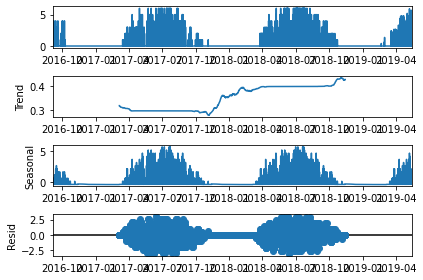

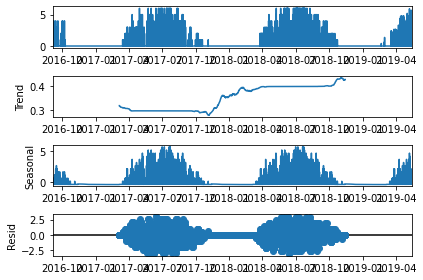

In [26]:
# Fit Seasonal Decomposition
decomp = seasonal_decompose(series, model="additive", period=24*365)
decomp.plot()

In [10]:
# Fit model
prod_arima = ARIMA(series, order=(1,0,0))
prod_arima_fit = prod_arima.fit()
print(prod_arima_fit.summary())

/Users/augusttollerup/Documents/SEM4/Fagprojekt/Otovo-OptimalControl/otovo/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/Users/augusttollerup/Documents/SEM4/Fagprojekt/Otovo-OptimalControl/otovo/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/Users/augusttollerup/Documents/SEM4/Fagprojekt/Otovo-OptimalControl/otovo/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                num_kwh   No. Observations:                23568
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -19620.496
Date:                Wed, 27 Apr 2022   AIC                          39246.992
Time:                        21:09:05   BIC                          39271.195
Sample:                    09-04-2016   HQIC                         39254.848
                         - 05-14-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2973      0.037      7.993      0.000       0.224       0.370
ar.L1          0.8180      0.003    307.797      0.000       0.813       0.823
sigma2         0.3095      0.001    249.935      0.0